# Системи Data Science. Лабораторна робота №2.

## Назва: Прогнозування вартості автомобілів

## Виконав: Кулик Костянтин, група КМ-81.

# 1. Вибір методу розв'язання задачі

## 1.1. Перелік існуючих підходів до розв'язання задачі

Розглянемо декілька основних підходів до розв'язання задачі регресії.

### 1.1.1. Лінійна регресія

Лінійна регресія - найбільш відомий та широковживаний прийом моделювання залежності між скалярною змінною $y$ та (в загальному випадку) векторною змінною $\vec{x}$. Разом з тим це найпростіший регресійний метод, одним із переваг якого являється легкість інтерпретації результатів.

У процесі розв'язання задачі лінійної регресії шукається така функція $y := f(x) = ax + b$, що найкраще (з найменшою похибкою) описує лінійну залежність між незалежною змінною (параметром) $x$ та залежною змінною (ціллю) $y$.

Якщо незалежна змінна представляє собою багатовимірну величину (вектор) $\vec{x}$, то регресія називається багатовимірною або множинною. Рівняння множинної регресії має наступний вигляд: $y = \vec{a}\cdot\vec{x} + b$. Також використовують наступний запис:

$y = b_0 + b_1 x_1 + b_2 x_2 + \ldots + b_n x_n$

Перевага у використанні множинної регресії полягає в тому, що збільшення кількості незалежних змінних покращує відповідність моделі даних (та, як наслідок, збільшує коефіцієнт детермінації).

### 1.1.2. Нейромережева регресія

**Комп'ютерною нейронною мережею** називають математичну модель, що імітує будову біологічного відповідника - нейронної мережі живого організму. Для спрощення обчислень нейрони часто поділяють на "шари".

Класифікація вхідного сигналу відбувається наступним чином:

1. Вхідний сигнал подається на нейрони вхідного (нульового) шару, кожен $j$-й нейрон отримує числове значення - активацію $x^0_j$.

2. Кожен наступний $j$-й нейрон $i$-того шару має вектор коефіцієнтів ваги (weights) $\vec{a^i_j}$ та коефіцієнт зміщення (bias) $b^i_j$, і отримує активацію, розраховану на основі активації нейронів попереднього ($i-1$-го) шару за формулою $x^i_j = \phi(\vec{a^i_j}\cdot\vec{x^{i-1}} + b^i_j)$, де $\phi$ - функція активації, зазвичай сигмоїда або ReLU.

3. Активації вихідного (останнього) шару інтерпретуються як вихідний сигнал нейромережі. Для задач класифікації зачасту визначають нейрон з найбільшою активацією і вважають результатом роботи відповідний цьому нейрону клас.

Для задачі регресії можна використати нейронну мережу з одним вихідним нейроном, замінивши його функцію активації на лінійну. Тоді на виході будуть не ймовірності віднесення вхідного сигналу до якого-небудь класу, а безперервне числове значення. Можна сказати, що така модель представляє собою **"нейромережеву регресію"**.

Така регресія матиме перевагу у нелінійності, однак, буде вимагати більше обчислень для отримання результату.

### 1.1.3. Регресія дерева рішень

**Регресійні дерева рішень** нагадують дерева класифікації, з тою відмінністю, що кінцеві вузли класифікації приводять не до одного чітко визначеного класу, а до безперервного числового значення.

Через специфічну природу регресії дерева рішень слід ретельно обрізати. Проте, така регресія не являється регулярною - замість того, щоб обчислювати значення в безперервному масштабі, вона зупиняється в кінцевих вузлах. Якщо дерево обрізане занадто сильно, у нього занадто мало кінцевих вузлів, щоб видати належний результат.

### 1.1.4. Гребенева регресія

**Гребенева (ridge) регресія** - один із методів зменшення розмірності. Часто його використовують для боротьби з надлишковими даними, коли наявна мультиколінеарність (деякі незалежні змінні корелюють між собою). Використання такої регресії дозволяє зменшити середньоквадратичну похибку.

Гребеневу регресію застосовують, якщо:

* параметри сильно зв'язані;
* власні значення сильно відрізняються (або серед них є близькі до нуля значення);
* матриця містить майже лінійно незалежні стовпці;

## 1.2. Опис обраного методу моделювання

### 1.2.1. Нарис обраної моделі та причини вибору

Для розв'язку поставленої задачі (прогнозування вартості автомобілів) добре підійде **регресія випадкового лісу**.

Випадковий ліс - модель, що складається з безлічі дерев рішень. Однак, замість усереднення прогнозів різних дерев (така модель називається просто лісом), випадковий ліс має наступні особливості:

* При побудові дерев з набору даних будується випадкова вибірка зразків;
* При поділі вузлів вибираються випадкові набори параметрів;

Така модель добре працює з нелінійними залежностями та слабо зв'язаними даними, що підходить для цільової задачі. Також (за рахунок незалежності дерев) можлива порівняно проста реалізація паралельного алгоритму.

### 1.2.1. Математичний опис моделі

Для кожного вузла дерево рішень шукає таке значення параметра, що призведе до мінімально можливого значення "забруднення Джині". Воно обчислюється за формулою:
$$G = 1 - \sum_{i=1}^{J} {(p_i)^2}$$
де $p_i$ - відношення конкретного класу до загальної кількості зразків (доля класу).

У процесі роботи алгоритм будує $n$ випадкових дерев рішень, після чого, у результаті "голосування" дерев, відбувається прогнозування.

Для реалізації моделі скористаємося бібліотекою `sklearn` та модулем `RandomForestRegressor`.

In [ ]:
import numpy as np # лінійна алгебра
import pandas as pd # робота з даними

import seaborn as sns # побудова графіків
from matplotlib import pyplot as plt # групування графіків

from sklearn.metrics import mean_absolute_error, mean_squared_error # цільові функції
from sklearn.ensemble import RandomForestRegressor # регресійна модель
from sklearn.model_selection import train_test_split, GridSearchCV # оптимізація

# 2. Формалізація цільової функції оптимізації та визначення ефективності моделі

## 2.1. Формалізація цільової функції оптимізації

Оскільки ми маємо справу з регресією, то в якості цільових функцій оптимізації будемо використовувати $MAE$ (середня абсолютна похибка) та $RMSE$ (корінь з середньоквадратичної похибки). Ці функції являються метриками та знаходять відстані між спрогнозованою та реальною точками. Це, фактично, стандартний спосіб оцінки похибки регресійних моделей.
$$MAE = \frac{1}{n} \sum_{i=1}^n {|y_i-\hat{y_i}|}$$
$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n {(y_i-\hat{y_i})^2}};$$

In [ ]:
def print_opt_metrics(y, y_pred):
    mae = mean_absolute_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)
    print(f"MAE  : {mae}")
    print(f"RMSE : {rmse}")

def print_determ_coeff(model, x, y):
    coeff_r2 = model.score(x, y)
    print(f"R2   : {coeff_r2}")

## 2.2. Визначення метрик ефективності моделі

Для визначення ефективності регресійної моделі зручно використовувати коефіцієнт детермінації $R^2$. Визначається він наступним чином:
$$R^2 = 1 - \frac{D[y|x]}{D[y]} = 1 - \frac{\sigma^2}{\sigma_y^2}$$
де $\sigma_y^2$ - дисперсія цільового параметру, $\sigma^2$ - умовна дисперсія (за факторами $X$) цільового параметру.

Параметр $R^2$ лежить в межах від $0$ до $1$. Чим він ближче до одиниці, тим точнішою є модель. Вважається, що для прийнятних моделей значення $R^2$ повинно бути не менше $0.5$.

# 3. Імплементація обраного методу моделювання

## 3.1. Створення моделі

Імпортуємо дані першої лабораторної роботи.

In [ ]:
data = pd.read_csv("/kaggle/input/car-price-prediction/preprocessed.csv")

x, y = data.loc[:, data.columns != "price"], data["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

print(f"Розмірність тренувальних даних : {x_train.shape}")
print(f"Розмірність тестових даних     : {x_test.shape}")
data.head()

За результатами першої лабораторної роботи було виявлено, що більшість параметрів є категоріальними, а числові параметри стандартизації не потребують.

Модель `RandomForestGenerator` з бібліотеки `sklearn` має декілька важливих гіперпараметрів:
* `n_estimators` - кількість дерев у лісі, спробуємо $200$;
* `max_depth` - максимальна глибина дерева, спробуємо $10$;
* `max_features` - максимальна кількість параметрів, що будуть аналізуватися в одному дереві. Згідно з емпірічним правилом, $n \in [\sqrt{m}; \frac{m}{2}]$, де $m$ - кількість параметрів ($28$), виберемо $28$;
* `min_samples_leaf` - мінімальна кількість зразків, що повинна бути у листовому вузлі, залишимо за замовчуванням;
* `min_samples_split` - мінімальна кількість зразків, необхідних для розділення внутрішнього вузла, залишимо за замовчуванням;

In [ ]:
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    max_features=28,
    n_jobs=-1,
)

## 3.2. Навчання моделі

Проведемо навчання моделі на тренувальних даних та здійснимо прогнозування для тестового набору параметрів, щоб оцінити ефективність моделі.

In [ ]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print_opt_metrics(y_test, y_pred)
print_determ_coeff(model, x_test, y_test)

## 3.3. Валідація та оптимізація гіперпараметрів

### 3.3.1. Валідація поточних гіперпараметрів

Перевіримо, наскільки добре модель з поточними гіперпараметрами прогнозує результат.

In [ ]:
def plot_model_predictions(y, y_test, y_pred):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle("Розподіли спрогнозованої та реальної величин")
    
    sns.kdeplot(y_test, label="Реальна величина", ax=axes[0])
    sns.kdeplot(y_pred, label="Спрогнозована величина", ax=axes[0])

    rng = np.arange(len(y_pred))
    axes[1].set_ylabel("Рейтинг")
    axes[1].scatter(rng, y_test, label="Реальна величина")
    axes[1].scatter(rng, y_pred, label="Спрогнозована величина")
    
    fig.legend()
    plt.tight_layout()
    plt.show()

plot_model_predictions(y, y_test, y_pred)

### 3.3.2. Оптимізація гіперпараметрів

Для оптимізації гіперпараметрів доцільно використати крос-валідаційний підхід. Він полягає в тренуванні великої кількості моделей з різними гіперпараметрами та наборами тренувальних даних. Для цього використаємо модель `GridSearchCV` з бібліотеки `sklearn`.

In [ ]:
def optimize_hyperparameters(model, x_train, y_train):
    grid = {
        'n_estimators': [100, 200, 500],
        'max_features': ['auto', 'sqrt'],
        'max_depth': [5, 20, 50],
        'bootstrap': [True, False]
    }
    grid_search_cv = GridSearchCV(estimator=model, param_grid=grid, verbose=2, n_jobs=-1)
    grid_tuned = grid_search_cv.fit(x_train, y_train)
    return grid_tuned.best_params_

optimized_hyperparams = optimize_hyperparameters(model, x_train, y_train)
optimized_model = RandomForestRegressor(**optimized_hyperparams)

optimized_hyperparams

### 3.3.3. Валідація оптимізованих гіперпараметрів

Перевіримо, наскільки добре модель з оптимізованими гіперпараметрами прогнозує результат.

In [ ]:
optimized_model.fit(x_train, y_train)
optimized_y_pred = optimized_model.predict(x_test)
plot_model_predictions(y, y_test, optimized_y_pred)

Оптимізована модель краще справляється з прогнозуванням значень, близьких до $10000$, але дає суттєво гірший результат на відрізку $[20000; 50000]$. Кращим рішенням буде залишити початкову модель.

## 3.4. Остаточне (одноразове) тестування моделі

Обчислимо прогнозовані результати та візуалізуємо валідаційні метрики.

In [ ]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
    
plot_model_predictions(y, y_test, y_pred)
print_opt_metrics(y_test, y_pred)
print_determ_coeff(model, x_test, y_test)

## 3.5. Інтерпретація отриманих результатів

Проаналізувавши виконану роботу, можна сказати, що для даної задачі модель регресії випадкового лісу виявилася ефективною, вона може адекватно прогнозувати як низькі, так і високі ціни з мінімальними похибками.

Переваги обраного методу:
* Метод аналізує не всі параметри разом, а лише їх обмежену кількість. Це дозволяє зменшити вплив мультиколінеарності.
* Багаторазовий аналіз підвищує ймовірність вдалого прогнозу.

Недоліки обраного методу:
* Необхідна більша обчислювальна потужність.
* Залежність від гіперпараметрів, оптимізація яких представляє собою окрему задачу.

Підготовка даних в першій лабораторній роботі суттєво вплинула на результати математичного моделювання. По-перше, була проведена очистка даних та видалення дублікатів, без чого подальший аналіз був би неможливим. Також було застосоване підходяще для задач регресії `one hot`-кодування, його негативна сторона - збільшення кількості параметрів - була компенсована особливостями регресії випадкового лісу.

Крос-валідаційний підхід `GridSearchCV` дозволив упевнитися в правильності вибору гіперпараметрів та продемонстрував баланс між якістю прогнозування значень різних відрізків.

## 3.6. Візуалізація та документування результатів / документування класів бізнес-профіля Еріксона-Пенкера.

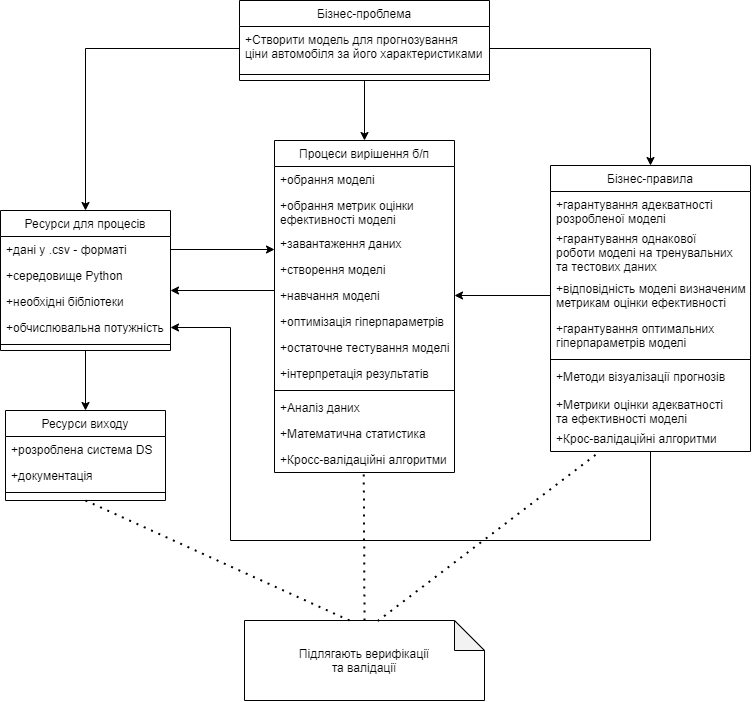

# 4. Верифікація та валідація

## 4.1. Верифікація

За умовами лабораторної роботи необхідно було створити модель вирішення бізнес-задачі DS для даних, що були підготовані в першій лабораторній роботі.

Були перелічені та описані основні методи розв'язання задачі регресії, серед яких була обрана модель `RandomForestRegressor` - регресія випадкового лісу. Вибір зумовлений порівняною складністю датасету та великою кількістю змінних.

Було формалізовано цільові функції оптимізації - $MAE$ та $RMSE$. В якості метрики ефективності моделі був використаний коефіцієнт детермінації $R^2$, що наочно демонструє відношення дисперсій.

Була проведена імплементація моделі `RandomForestRegressor`, в наступні кроки:
* створення (на підібраних емпірично гіперпараметрах)
* навчання моделі (`RandomForestRegressor.fit()`)
* проведення крос-валідації (`GridSearchCV.fit()`) для оптимізації гіперпараметрів
* остаточне тестування моделі
* візуалізація функцій оптимізації, метрик ефективності, розподілів прогнозів відносно реальних даних
* візуалізація і документування результатів / документування класів бізнес-профіля Еріксона-Пенкера

**Умови лабораторної роботи виконані, отже, верифікація пройшла успішно.**

## 4.2. Валідація

Отримана в ході виконання роботи регресійна модель відповідає вимогам якості, це демонструється прийнятними значеннями цільових функцій оптимізації - $MAE$ та $RMSE$ та критерію $R^2$.

Модель однаково добре справляється з тренувальними і тестовими даними.

Модель оптимізована, на що вказує відсутність покращення при подальшій оптимізації гіперпараметрів.

**Можна стверджувати, що розроблена модель пройшла кінцеву валідацію.**

# 5. Висновки

В ході виконання лабораторної роботи були отримані важливі навички DS:
* Ознайомилися з типовими задачами ML
* Ознайомилися з основними методами розв'язання регресійних задач
* Спроектували та реалізували модель прогнозування ціни автомобіля в залежності від його характеристик
* Провели крос-валідацію, оптимізували гіперпараметри
* Протестували отриману модель
* Проінтерпретували отримані результати

Обрана модель цілком задовольняє вимогам поставленої задачі.